In [146]:
# pip install xgboost

## Import Libraries

In [147]:
import pandas as pd
import numpy as np
import re

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

import xgboost as xgb

In [148]:
# read in csv file
train = pd.read_csv('train_cleaned.csv')

---

## Model Pre-processing

In [149]:
# create index column
train['index'] = train.index

### One-hot Encoding

In [150]:
# one-hot encoding
# dummifying country, store and product
col_list = ['trap', 'species','index']
dummified = pd.get_dummies(train[col_list])

# merging dummified variables into dataframe & drop columns we will not be using
train = pd.merge(train,dummified, how='outer', on='index')
train = train.drop(columns=['trap','species','index','date','address','longitude','latitude']);

### Upsampling

In [151]:
upsample = resample(wnv,
             replace=True,
             n_samples=9955,
             random_state=42)

no_wnv = train[train['wnvpresent']==0]

In [152]:
df = pd.merge(no_wnv,upsample, how='outer')

In [153]:
df['wnvpresent'].value_counts()

0    9955
1    9955
Name: wnvpresent, dtype: int64

### Train-Test Split

In [154]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(columns=['wnvpresent'])
y = df['wnvpresent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

---

## Modeling

### Logistic Regression

In [155]:
clf = LogisticRegression(C=1,solver='newton-cg',class_weight='balanced')
clf.fit(X_train, y_train)

print(f"Train Score : {clf.score(X_train, y_train)}")
print(f"Test Score : {clf.score(X_test, y_test)}")

/Users/mingjie/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/mingjie/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Train Score : 0.7580028487892646
Test Score : 0.7505706893927865


### Random Forest Classifier

In [156]:
clf = RandomForestClassifier(n_estimators=2 ,max_depth=None, random_state=0)
clf.fit(X_train, y_train)

print(f"Train Score : {clf.score(X_train, y_train)}")
print(f"Test Score : {clf.score(X_test, y_test)}")

Train Score : 0.9808831246720144
Test Score : 0.9695632323847208


### Grid-Search

In [157]:
#rf_params = {
#    'n_estimators': [100, 150, 200],
#    'max_depth': [None, 1, 2, 3, 4, 5],
#}
#gs = GridSearchCV(clf, param_grid=rf_params, cv=5)
#gs.fit(X_train, y_train)
#print(gs.best_score_)
#gs.best_params_

/Users/mingjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


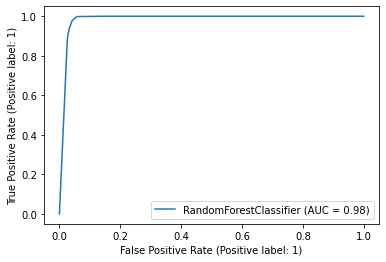

In [158]:
lr_disp = plot_roc_curve(clf, X_test, y_test)

### XGBoost

In [159]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

print(f"Train Score : {clf.score(X_train, y_train)}")
print(f"Test Score : {clf.score(X_test, y_test)}")

Train Score : 0.9387510308119049
Test Score : 0.9243646324760311


---